## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview -- Get to know what each Label represents.

In [1]:
import pandas as pd

In [4]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(col_name+" = "+ data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

mort_acc = Number of mortgage accounts.


## Loading the data and other imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv('lending_club_loan_two.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Part 1 - EDA -- We will try to get a general feeling about the Data.

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<Axes: xlabel='loan_status', ylabel='count'>

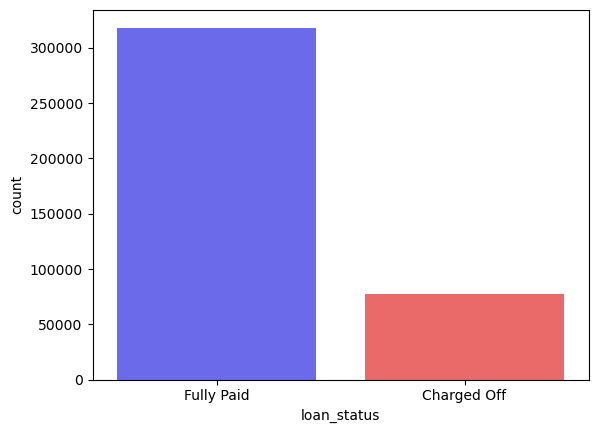

In [10]:
sns.countplot(data=df,x='loan_status',palette='seismic')

<Axes: xlabel='loan_amnt', ylabel='Count'>

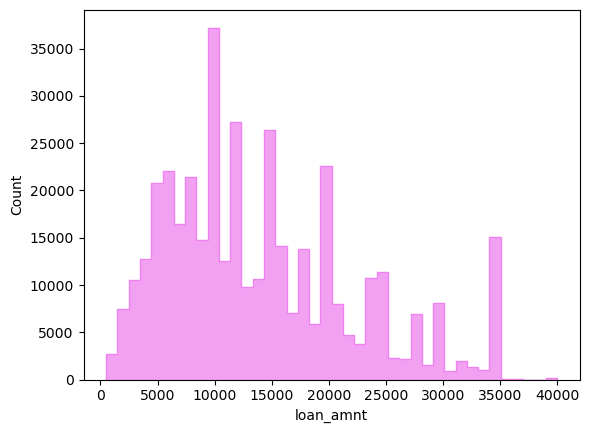

In [11]:
sns.histplot(data=df,x='loan_amnt',bins=40,element='step',color='violet')

In [12]:
df.corr()

C:\Users\RO20359598\AppData\Local\Temp\ipykernel_68836\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


C:\Users\RO20359598\AppData\Local\Temp\ipykernel_68836\743334478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='rocket_r')


<Axes: >

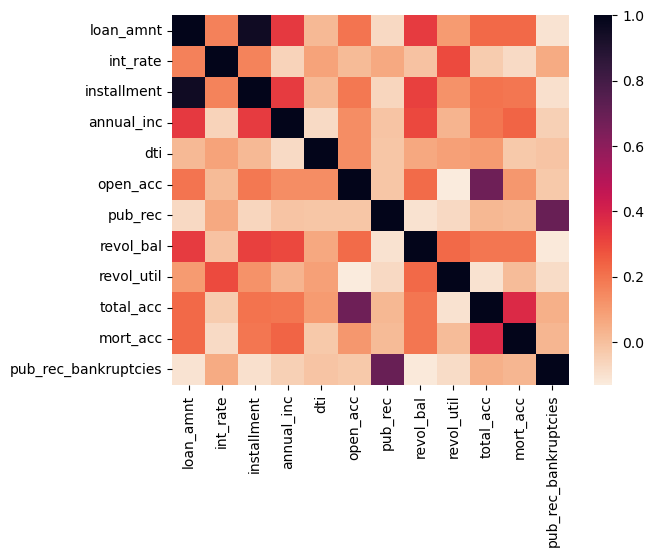

In [13]:
sns.heatmap(df.corr(),cmap='rocket_r')

**We can see that there is a huge positive corelation between 'installment' and 'loan_amnt'.**

**We will explore the above 2 labels further and check if they actually represent same information or not.**

In [14]:
feat_info('installment')

installment = The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info('loan_amnt')

loan_amnt = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

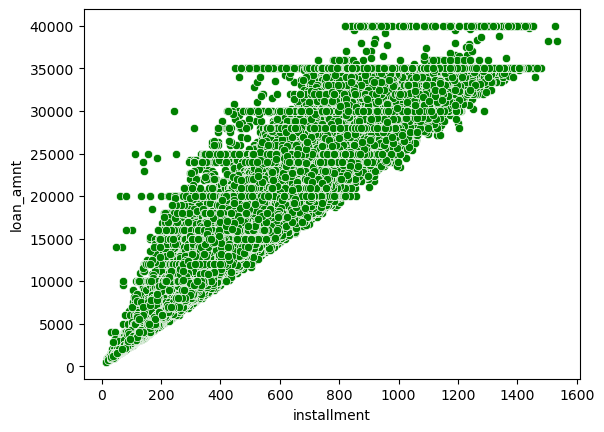

In [16]:
sns.scatterplot(data=df,x='installment',y='loan_amnt',color='green')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

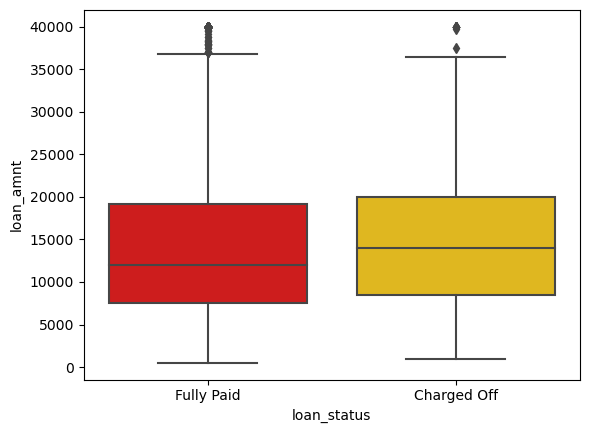

In [17]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt',palette='hot')

**Summary Statistics for the loan amount, grouped by the loan_status.**

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans**

In [19]:
set(df['grade'].values)         # unique number of grades possible.

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [20]:
order1=sorted(set(df['sub_grade'].values))      # unique number of sub_grades possible.
order1

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

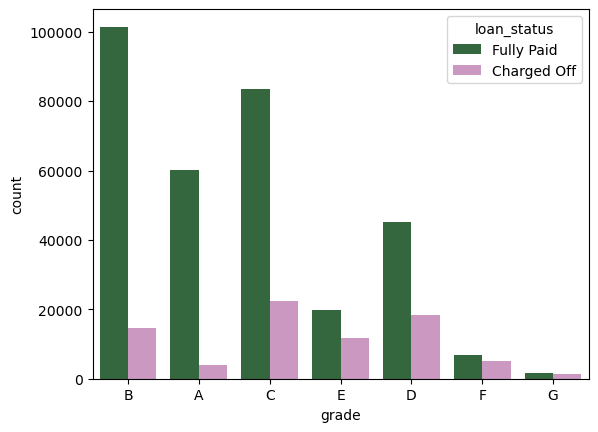

In [21]:
sns.countplot(data=df,x='grade',hue='loan_status',palette='cubehelix')  # Countplot per grade based on loan_status.

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

<Axes: xlabel='sub_grade', ylabel='count'>

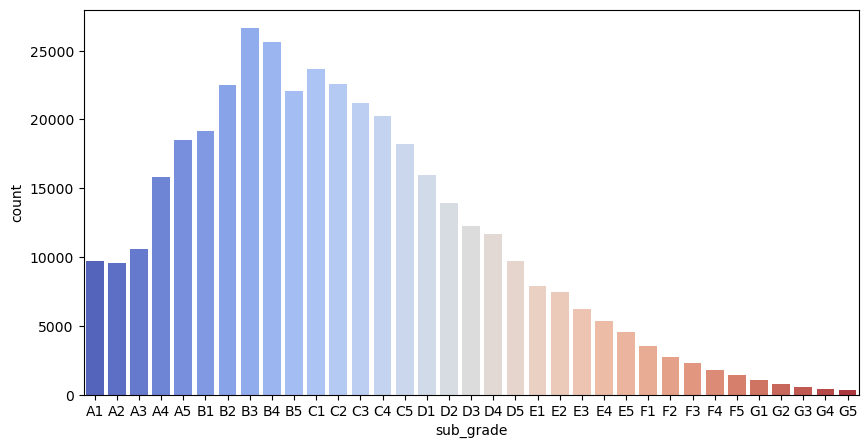

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='sub_grade',order=order1,palette='coolwarm')# Countplot per sub_grade based on loan_status, but ordered.

<Axes: xlabel='sub_grade', ylabel='count'>

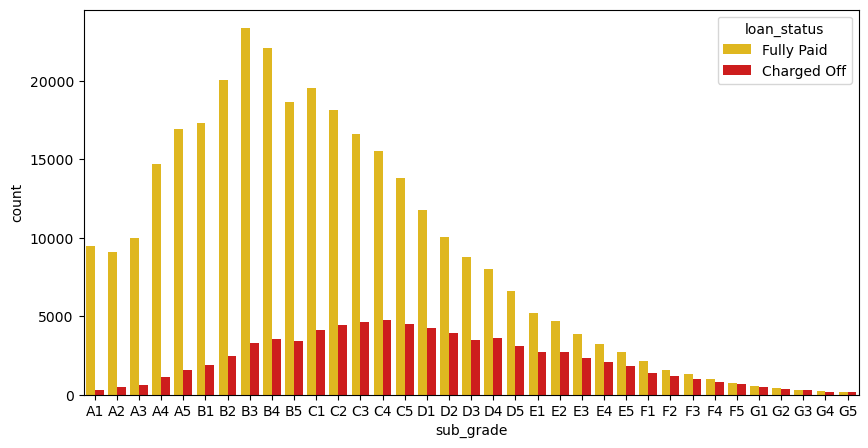

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='sub_grade',order=order1,palette='hot_r',hue='loan_status')

**It looks like F and G subgrades don't get paid back that often. For grades A to E , we can see the count of loans being fully paid way higher than the loans which were charged off.**

**But for E and F , both the values of loan_status are comparable. We isloate those and recreate the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

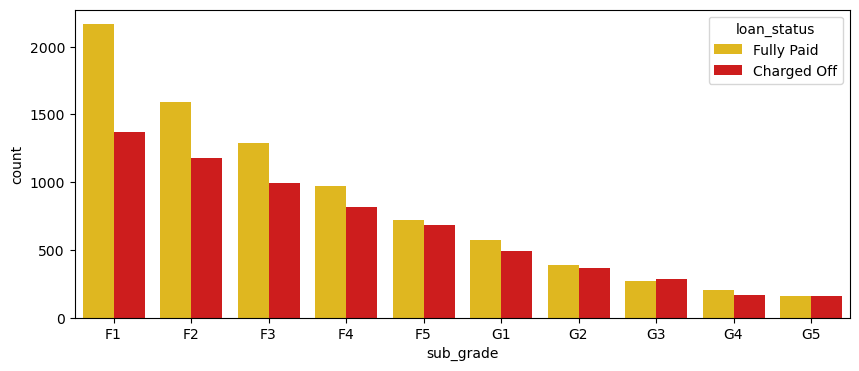

In [24]:
plt.figure(figsize=(10,4))
f_and_g=df[(df['grade']=='F') | (df['grade']=='G')]
sns.countplot(data=f_and_g,x='sub_grade',hue='loan_status',order=order1[-10:],palette='hot_r')

**We will create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off". This will be helpful in building our model.**

In [25]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [26]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [27]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**We create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

C:\Users\RO20359598\AppData\Local\Temp\ipykernel_68836\1199757168.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar',color='red')


<Axes: >

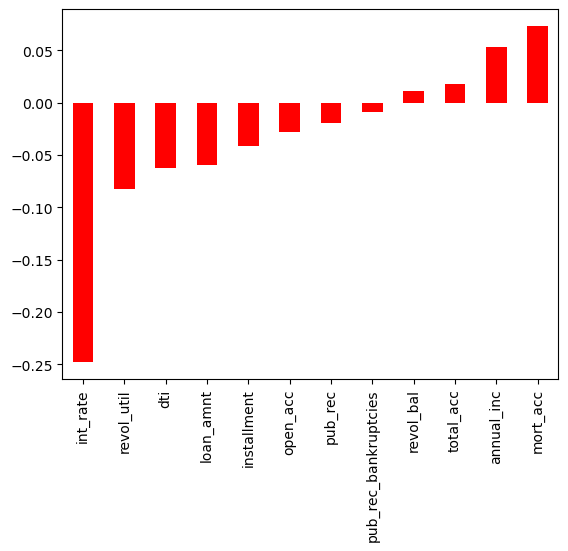

In [29]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar',color='red')

---
---
# Part 2 - Data PreProcessing -- We will remove or fill any missing data, remove unnecessary or repetitive features.
---


In [30]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

In [31]:
len(df)

396030

**Total Count of missing values per label.**

In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Total Count of missing values per label.(In Percentage)**

In [33]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**We will handle each of the missing values step by step.**

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [34]:
feat_info('emp_title')
print(" ")
feat_info('emp_length')

emp_title = The job title supplied by the Borrower when applying for the loan.*
 
emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**unique employment job titles**

In [35]:
df['emp_title'].nunique()

173105

In [36]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Since there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove the emp_title column.**

In [37]:
df.drop('emp_title',axis=1,inplace=True)

In [38]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<Axes: xlabel='emp_length', ylabel='count'>

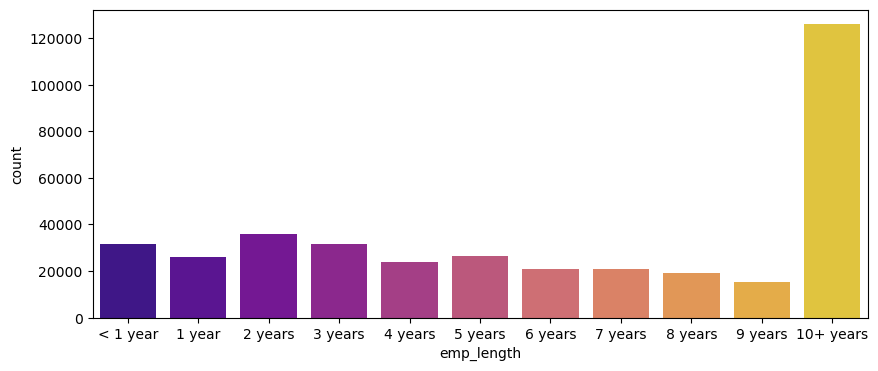

In [39]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order,palette='plasma')

**Countplot with a hue separating Fully Paid vs Charged Off**

<Axes: xlabel='emp_length', ylabel='count'>

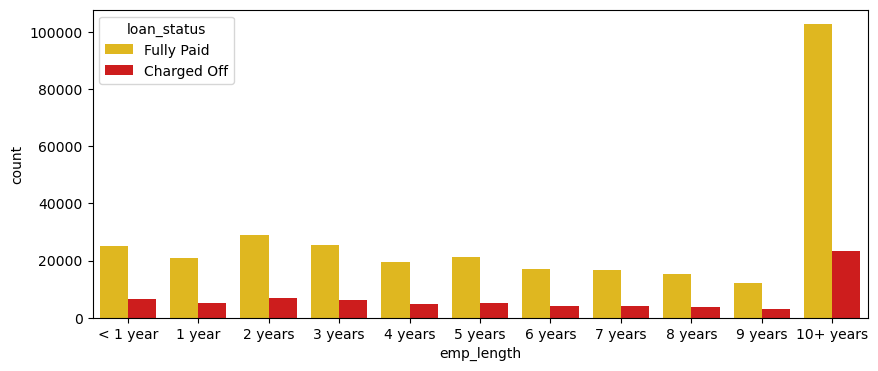

In [40]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order,palette='hot_r',hue='loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [41]:
emp_fp=df[df["loan_status"]=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_co=df[df["loan_status"]=='Charged Off'].groupby('emp_length').count()['loan_status']

In [42]:
print(emp_co)
print(emp_fp)

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64
emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64


In [43]:
emp_len=100*emp_co/(emp_fp+emp_co)

In [44]:
emp_len

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

<Axes: title={'center': '% of loans Charged Off per emp_length'}, xlabel='emp_length', ylabel='Percentage'>

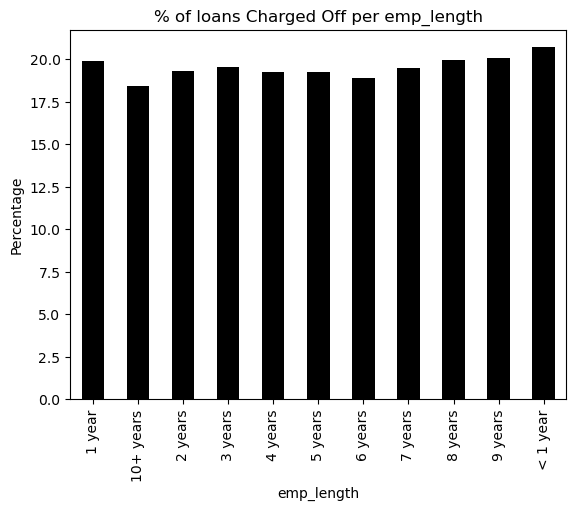

In [45]:
emp_len.plot(kind='bar',color='black',title='% of loans Charged Off per emp_length',ylabel='Percentage')


**Charge off rates are extremely similar across all employment lengths. So we will drop the emp_length column.**

In [46]:
df.drop('emp_length',axis=1,inplace=True)

In [47]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**We will now review the title column vs the purpose column.**

In [48]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [49]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

**We can clearly see that the information is repeated in both columns, So we will go ahead and drop the 'title' column.**

In [50]:
df.drop('title',axis=1,inplace=True)

In [51]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Now, We will turn our attention to 'mort_acc'.we will find out what the mort_acc feature represents**

In [52]:
feat_info('mort_acc')

mort_acc = Number of mortgage accounts.


In [53]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [54]:
df.corr()['mort_acc'].sort_values()

C:\Users\RO20359598\AppData\Local\Temp\ipykernel_68836\2388834679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**From the above correlation values, it looks like the total_acc feature correlates the most with the mort_acc.**

In [55]:
total_acc_avg=df.groupby('total_acc')['mort_acc'].mean()
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Wherever the 'mort_acc' is missing, then we will fill in that missing value with the mean value corresponding to its 'total_acc' value from the Series we created above.**

In [56]:
def fill_mort(acc,mort):
    if np.isnan(mort):
        return total_acc_avg[acc]
    else:
        return mort


In [57]:
df['mort_acc']=df.apply(lambda x : fill_mort(x['total_acc'],x['mort_acc']),axis=1)

In [58]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**Since the missing data points for 'revol_util' and the 'pub_rec_bankruptcies' account for less than 0.5% of the total data. We can go ahead and remove the rows that are missing those values in those columns with dropna().**

In [59]:
df.dropna(inplace=True)

In [60]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Part 3 - Categorical Variables and Dummy Variables

**We will first list down all labels which are non-numeric.**

In [61]:
list(df.select_dtypes(['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### Term Feature

In [62]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

**We will convert the label into an integer with removing the string "months" from it.**

In [64]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [65]:
df['term'].unique()

array([36, 60], dtype=int64)

### grade feature

**grade is already a level higher of sub_grade, so just drop the grade feature.**

In [66]:
df.drop('grade',axis=1,inplace=True)

**We will convert the subgrade into dummy variables and then concatenate these new columns to the original dataframe.**

In [67]:
subgrade_dummies=pd.get_dummies(data=df['sub_grade'],drop_first=True)

In [68]:
subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [70]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [71]:
list(df.select_dtypes(['object']).columns)

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### verification_status, application_type,initial_list_status,purpose 
**We will convert the columns: 'verification_status', 'application_type','initial_list_status','purpose' into dummy variables and concatenate them with the original dataframe.**

In [72]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [73]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership

In [74]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**We will convert the above label into dummy variables, but we will replace 'NONE' and 'ANY' with 'OTHER', so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [75]:
df['home_ownership']=df['home_ownership'].replace(['ANY','NONE'],'OTHER')

In [76]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [77]:
ho_dummies=pd.get_dummies(df['home_ownership'],drop_first=True)
df=df.drop('home_ownership',axis=1)
df=pd.concat([df,ho_dummies],axis=1)

In [78]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address


In [80]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

**We will feature engineer a zip code column from the address in the data set, by creating a column called 'zip_code' that extracts the zip code from the address column.**

In [84]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [85]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

**Now we will make this zip_code column into dummy variables using pandas.**

In [86]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [87]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### issue_d 

In [89]:
feat_info('issue_d')

issue_d = The month which the loan was funded


**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. So we can drop this.**

In [90]:
df.drop('issue_d',axis=1,inplace=True)

### earliest_cr_line

In [91]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [93]:
feat_info('earliest_cr_line')

earliest_cr_line = The month the borrower's earliest reported credit line was opened


**This appears to be a historical time stamp feature.we will extract the year from this feature.**

In [94]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [95]:
df = df.drop('earliest_cr_line',axis=1)
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [96]:
list(df.select_dtypes(['object']).columns)

['loan_status']

### **We have achieved our Data preprocessing steps. 'loan_status' is just a duplicate of the 'loan_repaid' feature so we can drop that too.**

# Part 4 - Train Test Split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
df.drop('loan_status',axis=1,inplace=True)

In [99]:
X=df.drop('loan_repaid',axis=1)
y=df['loan_repaid']

In [100]:
len(df)

395219

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Normalize the feature data X_train and X_test.**

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler=MinMaxScaler()

In [104]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [105]:
len(df.columns)

79

# Part 5 - Creating the Model

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

## 1st Model [ WITH NO DROPOUT , NO EARLY STOPPING ] 

In [107]:
model = Sequential()

model.add(Dense(79,activation='relu'))

model.add(Dense(38,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

**Fit the above model.**

In [108]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 8s 4ms/step - loss: 0.2838 - val_loss: 0.2665
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2625 - val_loss: 0.2644
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2605 - val_loss: 0.2652
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2594 - val_loss: 0.2614
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2585 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2580 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2575 - val_loss: 0.2621
Epoch 8/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2571 - val_loss: 0.2641
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2567 - val_loss: 0.2624
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.256

**Save the model.**

In [109]:
from tensorflow.keras.models import load_model

In [110]:
model.save('full_data_project_model-version-1.h5')

### Evaluating Model Performance.

**validation loss versus the training loss.**

In [111]:
losses1=pd.DataFrame(model.history.history)

<Axes: >

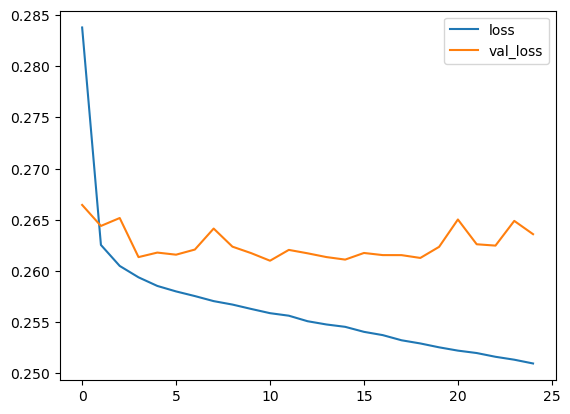

In [112]:
losses1.plot()

**We will create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [113]:
predictions1=model.predict(X_test).round()

2471/2471 [==============================] - 3s 1ms/step


In [114]:
from sklearn.metrics import confusion_matrix,classification_report

In [115]:
print(classification_report(y_test,predictions1))
print(" ")
print(confusion_matrix(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.90      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044

 
[[ 7345  8313]
 [  625 62761]]


## 2nd Model [ WITH NO EARLY STOPPING ]

In [116]:
model2 = Sequential()

model2.add(Dense(79,activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(38,activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(19,activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(1,activation='sigmoid'))


model2.compile(loss='binary_crossentropy', optimizer='adam')

**Fit the above model.**

In [117]:
model2.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 9s 6ms/step - loss: 0.3160 - val_loss: 0.2657
Epoch 2/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2699 - val_loss: 0.2637
Epoch 3/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2660 - val_loss: 0.2634
Epoch 4/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2642 - val_loss: 0.2626
Epoch 5/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2635 - val_loss: 0.2641
Epoch 6/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2627 - val_loss: 0.2632
Epoch 7/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2626 - val_loss: 0.2618
Epoch 8/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2623 - val_loss: 0.2623
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2622 - val_loss: 0.2622
Epoch 10/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.261

**Save the model.**

In [118]:
model2.save('full_data_project_model-version-2.h5')

### Evaluating Model Performance.

**validation loss versus the training loss.**

<Axes: >

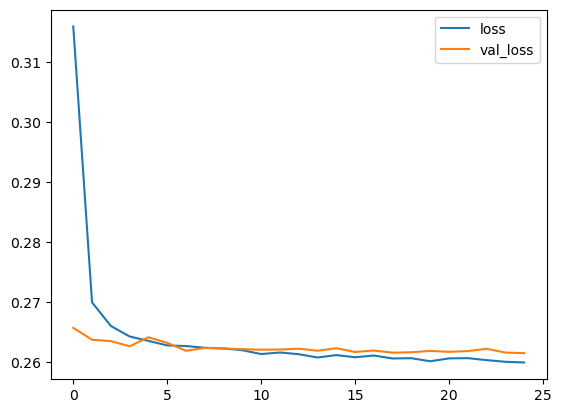

In [119]:
losses2=pd.DataFrame(model2.history.history)

losses2.plot()

**We will create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [121]:
predictions2 = model2.predict(X_test).round()
print(" ")
print(classification_report(y_test,predictions2))
print(" ")
print(confusion_matrix(y_test,predictions2))



2471/2471 [==============================] - 4s 2ms/step
 
              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

 
[[ 6806  8852]
 [   67 63319]]


## 3rd Model [ WITH DROPOUT,WITH CALLBACK]

In [122]:
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [127]:
model3 = Sequential()

model3.add(Dense(79,activation='relu'))
model3.add(Dropout(0.4))

model3.add(Dense(38,activation='relu'))
model3.add(Dropout(0.4))

model3.add(Dense(19,activation='relu'))
model3.add(Dropout(0.4))

model3.add(Dense(1,activation='sigmoid'))


model3.compile(loss='binary_crossentropy', optimizer='adam')

In [128]:
model3.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=256,
          validation_data=(X_test, y_test),callbacks=[early_stop] 
          )

Epoch 1/50
1236/1236 [==============================] - 8s 5ms/step - loss: 0.3169 - val_loss: 0.2660
Epoch 2/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2704 - val_loss: 0.2639
Epoch 3/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2664 - val_loss: 0.2640
Epoch 4/50
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2643 - val_loss: 0.2629
Epoch 5/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2634 - val_loss: 0.2625
Epoch 6/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2629 - val_loss: 0.2632
Epoch 7/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2626 - val_loss: 0.2624
Epoch 8/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2625 - val_loss: 0.2625
Epoch 9/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2620 - val_loss: 0.2626
Epoch 10/50
1236/1236 [==============================] - 6s 5ms/step - loss: 0.262

**Save the model.**

In [129]:
model3.save('full_data_project_model-version-3.h5')

### Evaluating Model Performance.

**validation loss versus the training loss.**

<Axes: >

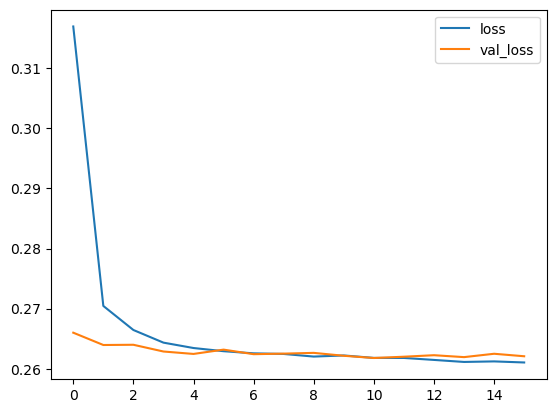

In [130]:
losses3=pd.DataFrame(model3.history.history)

losses3.plot()


**We will create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [131]:
predictions3 = model3.predict(X_test).round()
print(" ")
print(classification_report(y_test,predictions3))
print(" ")
print(confusion_matrix(y_test,predictions3))

2471/2471 [==============================] - 3s 1ms/step
 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

 
[[ 6720  8938]
 [    0 63386]]


### In general, Type II errors are more serious than Type I errors; 
### seeing an effect when there isn't one (e.g., believing an ineffectual drug works) is worse than missing an effect (e.g., an effective drug fails a clinical trial).
### Thus we go ahead with 'model3'

**Prediction for a completely new data**

In [132]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [133]:
model3.predict(new_customer.values.reshape(1,78))

1/1 [==============================] - 0s 41ms/step


array([[1.]], dtype=float32)

**did this person actually end up paying back their loan?**

In [134]:
df.iloc[random_ind]['loan_repaid']

1.0

# Our Model Works !!!!!